# Model Performance and Robustness Visualizations
This notebook contains visualizations for the Shallow-Deep Hybrid Neural Network models on the UNSW-NB15 dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/model_performance_data.csv')
df

,Model,Accuracy (%),F1-Score,CPU Usage (%),Memory (MB),Inference Time (s),MRS
0,Shallow20,93.0,0.91,12.8,75,0.52,96.77
1,Deep20,95.0,0.94,48.2,230,0.67,38.19
2,WgtAv20,95.0,0.95,56.7,275,0.70,34.06
3,Maximum20,95.0,0.95,58.2,280,0.73,33.65
4,Minimum20,94.0,0.93,55.0,270,0.72,34.43


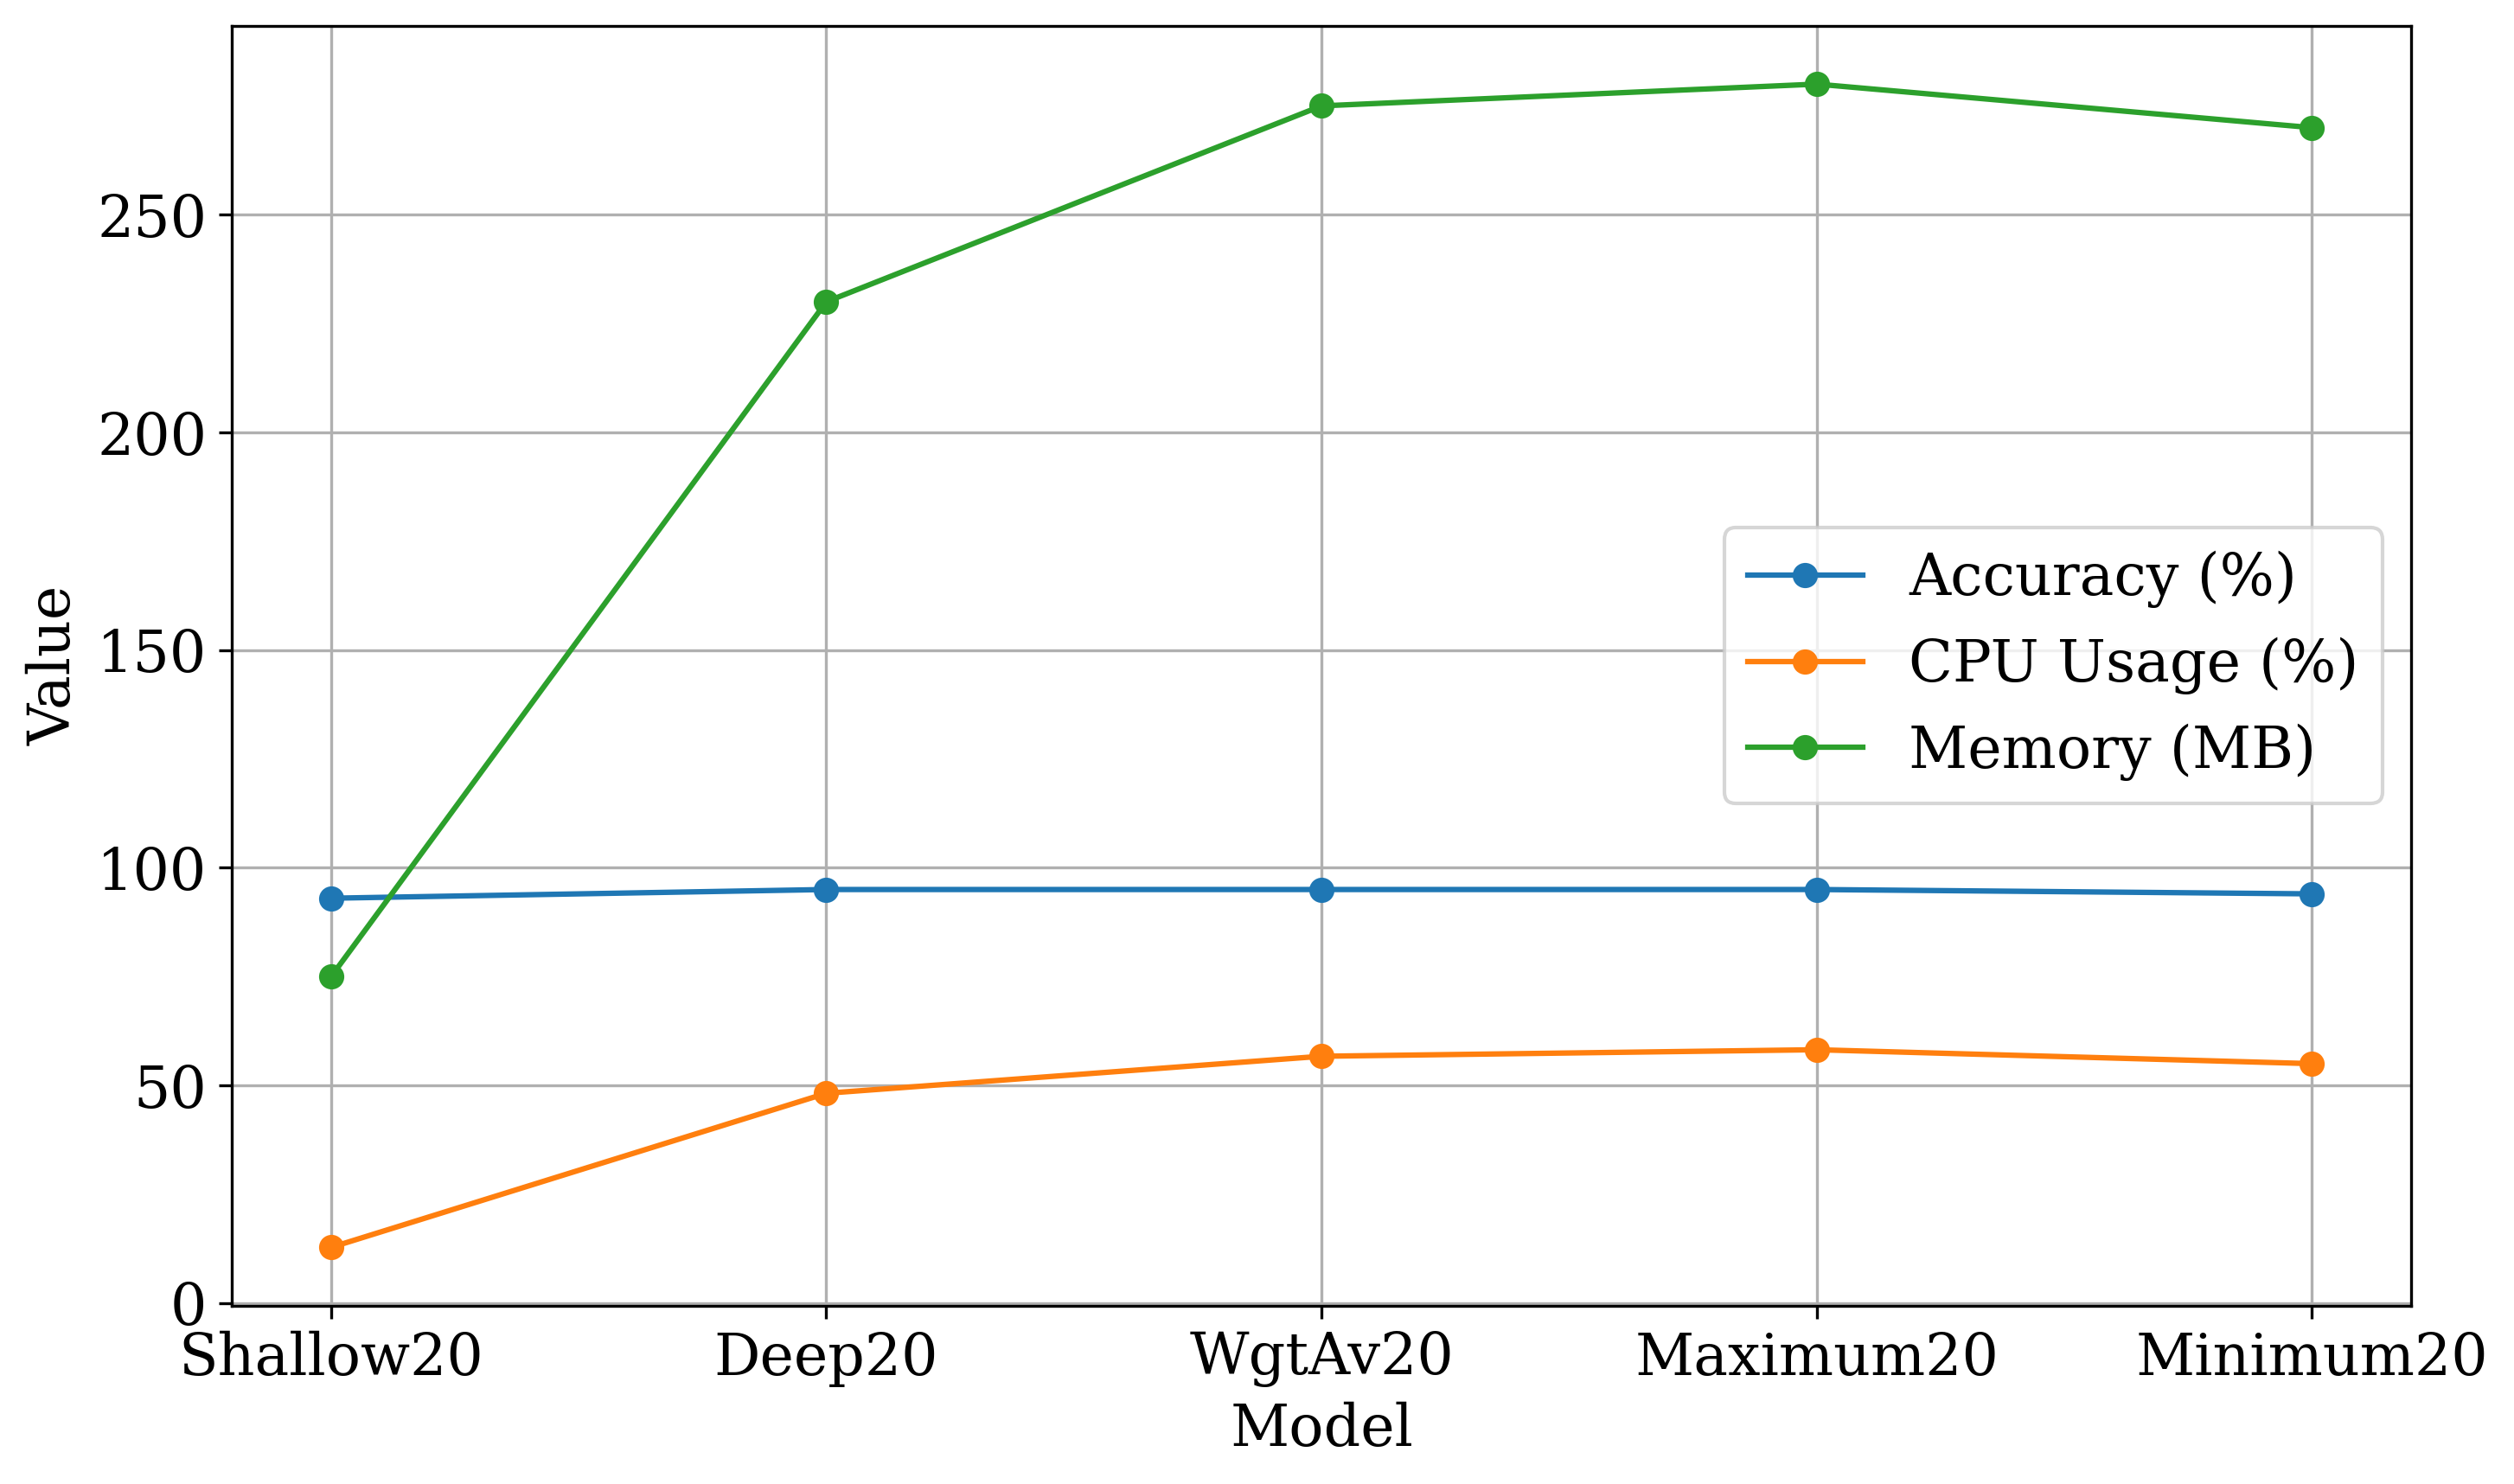

In [ ]:
# Set global font settings
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16

# Plot
plt.figure(figsize=(10,6), dpi=300)
plt.plot(df['Model'], df['Accuracy (%)'], marker='o', label='Accuracy (%)')
plt.plot(df['Model'], df['CPU Usage (%)'], marker='o', label='CPU Usage (%)')
plt.plot(df['Model'], df['Memory (MB)'], marker='o', label='Memory (MB)')
#plt.title('Accuracy vs Resource Usage')
plt.xlabel('Model')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig('Accuracy_vs_Resource_Usage.png', dpi=300)
plt.show()

<ipython-input-6-8084b2e14064>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MRS', data=df, palette='viridis')


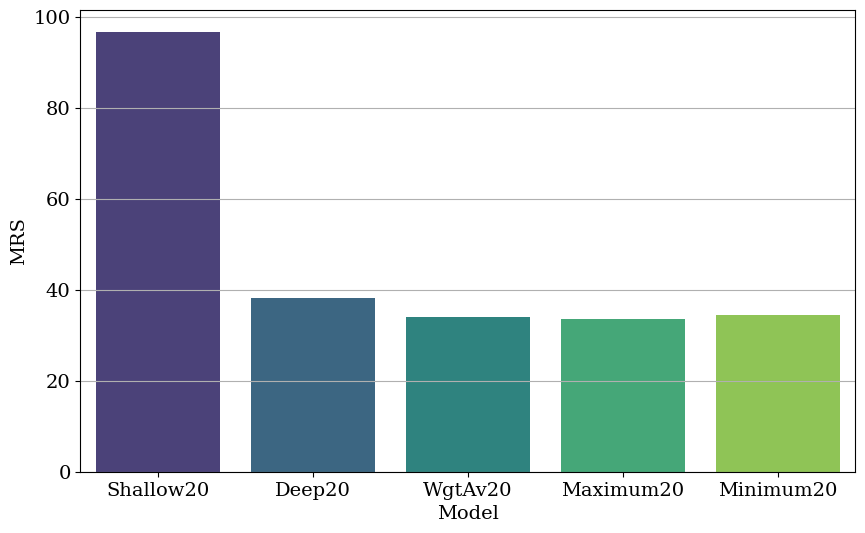

In [ ]:
plt.rcParams['font.size'] = 14
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='MRS', data=df, palette='viridis')
#plt.title('Model Robustness Score (MRS)')
plt.ylabel('MRS')
plt.grid(True, axis='y')
# Save the figure
plt.savefig('Model_Robustness_Score.png', dpi=300)
plt.show()


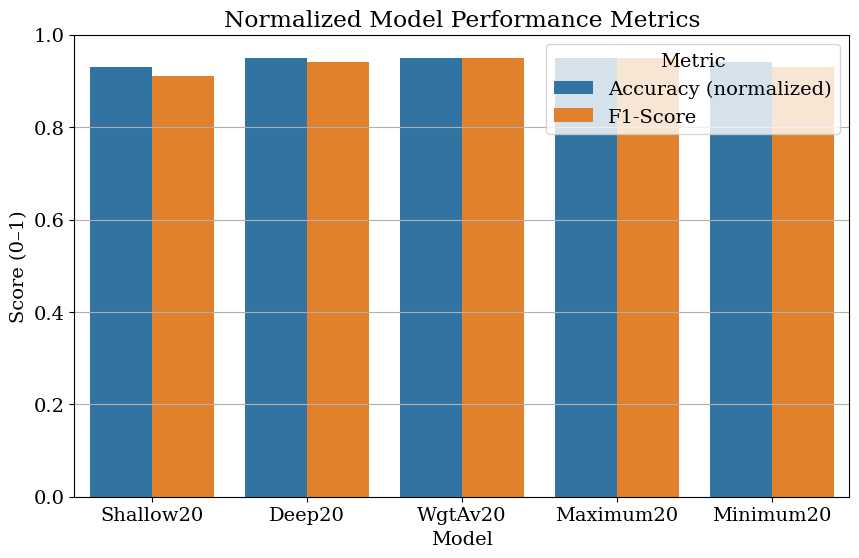

In [ ]:
df['Accuracy (normalized)'] = df['Accuracy (%)'] / 100

df_melted = df.melt(
    id_vars=['Model'],
    value_vars=['Accuracy (normalized)', 'F1-Score'],
    var_name='Metric',
    value_name='Score'
)

plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted)
plt.ylim(0, 1)
plt.ylabel('Score (0–1)')
plt.grid(True, axis='y')
#plt.title('Normalized Model Performance Metrics')
plt.show()


In [ ]:
df_melted

,Model,Metric,Score
0,Shallow20,Accuracy (normalized),0.93
1,Deep20,Accuracy (normalized),0.95
2,WgtAv20,Accuracy (normalized),0.95
3,Maximum20,Accuracy (normalized),0.95
4,Minimum20,Accuracy (normalized),0.94
5,Shallow20,F1-Score,0.91
6,Deep20,F1-Score,0.94
7,WgtAv20,F1-Score,0.95
8,Maximum20,F1-Score,0.95
9,Minimum20,F1-Score,0.93


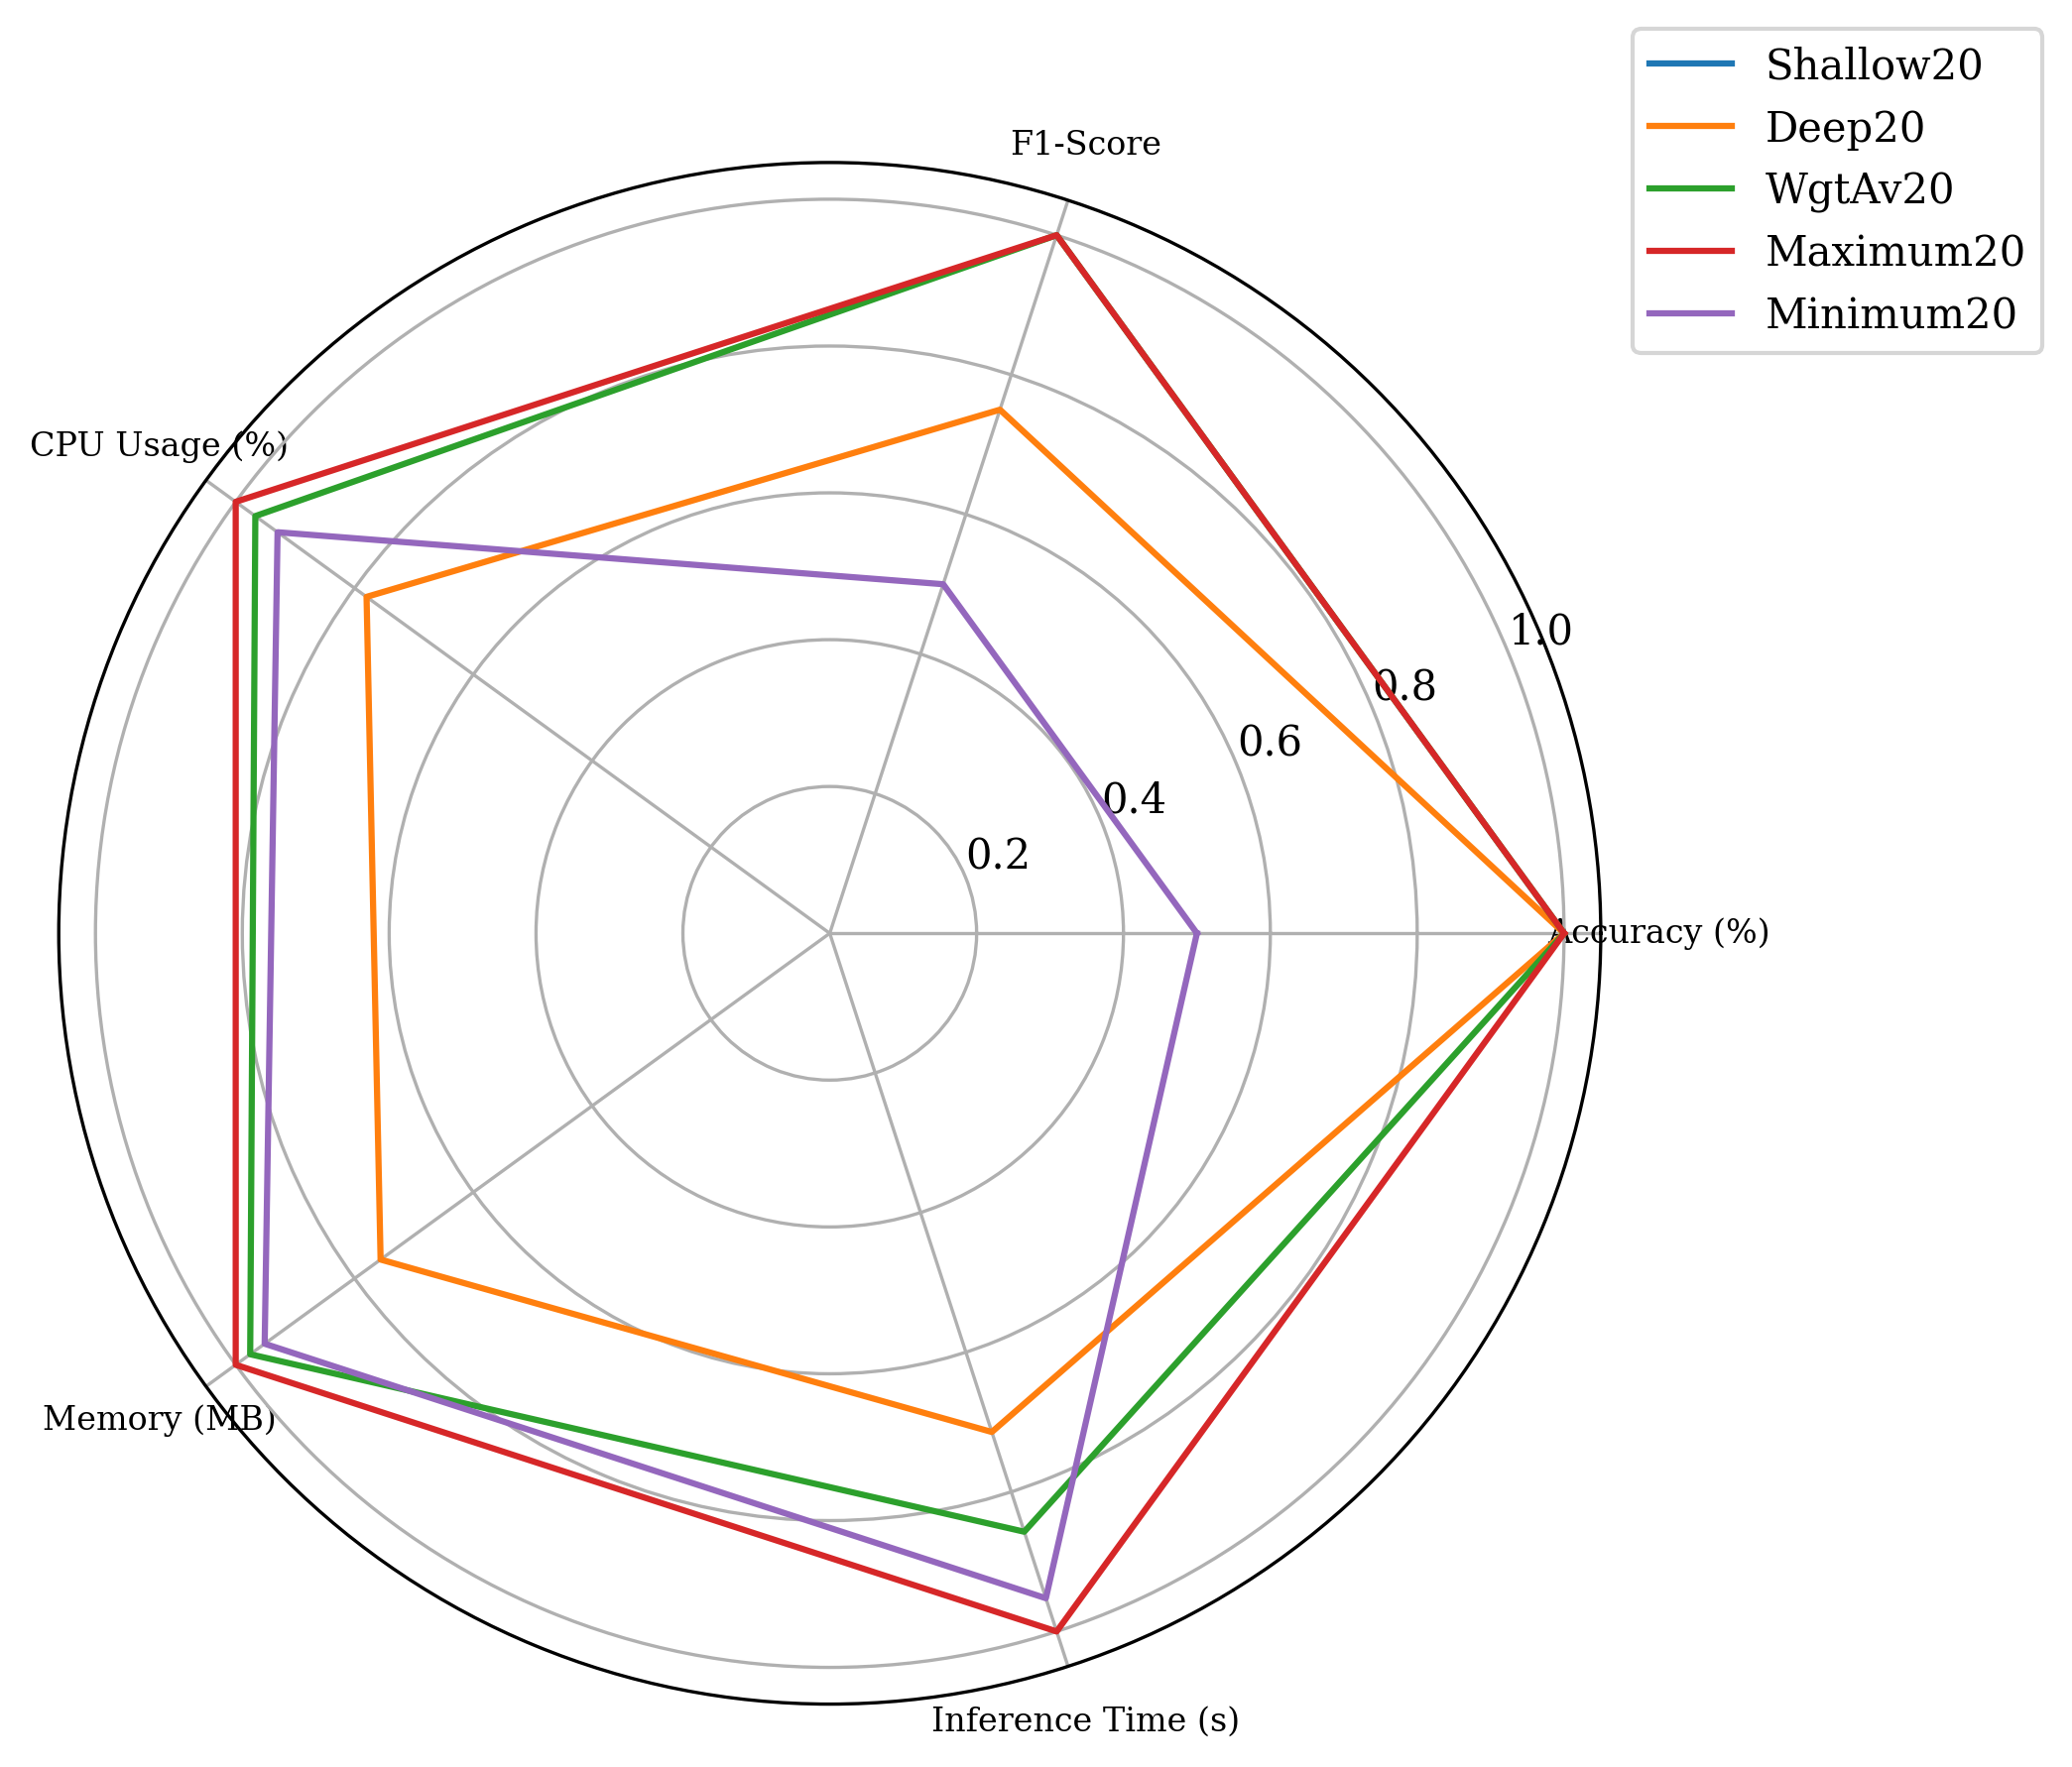

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Example: load your data (if using Colab)
# df = pd.read_csv('/content/model_performance_data.csv')

# Define the metrics
categories = ['Accuracy (%)', 'F1-Score', 'CPU Usage (%)', 'Memory (MB)', 'Inference Time (s)']
N = len(categories)

# Normalize each metric to 0–1
df_norm = df.copy()
for col in categories:
    min_val = df[col].min()
    max_val = df[col].max()
    df_norm[col] = (df[col] - min_val) / (max_val - min_val)

# Radar chart setup
plt.figure(figsize=(10, 6), dpi=300)
plt.rcParams['font.size'] = 10  # general font size

# Plot each model
for index, row in df_norm.iterrows():
    values = row[categories].tolist()
    values += values[:1]  # close the loop
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    plt.polar(angles, values, label=row['Model'])

# Add category labels and styling
plt.xticks(angles[:-1], categories, size=8)
#plt.title('Normalized Radar Chart (0–1 Scale)', size=12)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()

# Save the figure
plt.savefig('Normalized_Radar_Chart.png', dpi=300)
plt.show()


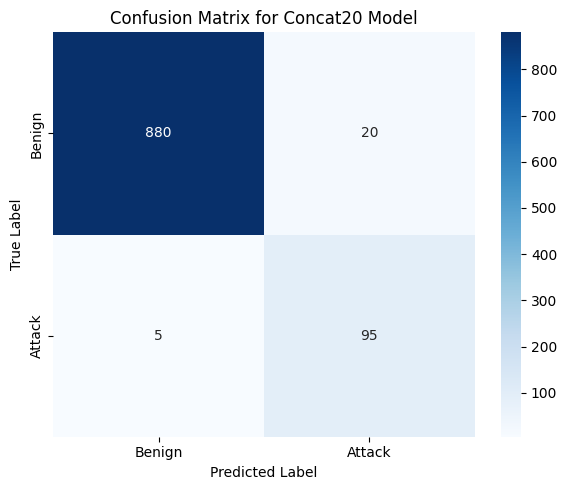

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Sample ground truth and predictions — REPLACE with your real data
y_true = [0]*900 + [1]*100  # 0 = Benign, 1 = Attack
y_pred = [0]*880 + [1]*20 + [1]*95 + [0]*5  # simulated slightly imperfect predictions

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = ['Benign', 'Attack']

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Concat20 Model')
plt.tight_layout()

# Save the figure
plt.savefig('confusion_matrix_concat20.png', dpi=300)
plt.show()
